In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Discrete time model with 1-variable: Exponential growth

$$ x_t = a x_{t-1}$$

In [2]:
# initialize system
a = 1.1
x = np.zeros(50)

# set I.C.
x[0] = 50

In [3]:
# simulation
for t in range(1, 50):
    x[t] = a*x[t-1]

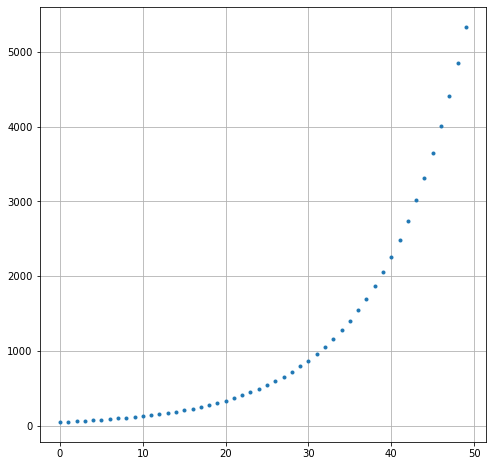

In [4]:
# visualize
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(range(50), x, '.', linewidth=3)
ax.grid()

### Discrete time model with 1-variable: Logistic growth model

In [5]:
# initialize system
a = 1.1
r = 0.1
N = 100 # number of time steps
x = np.zeros(N)
K = 5000

# set I.C.
x[0] = 50

In [6]:
# simulation
for t in range(1, N):
    x[t] = x[t-1] + r*x[t-1]*(1-x[t-1]/K)

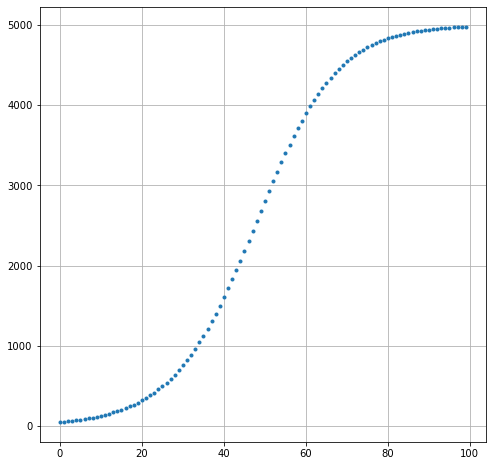

In [7]:
# visualize
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(range(N), x, '.', linewidth=3)
ax.grid()

Note how the parameter _K_ constrains the growth. 

### Phase space

Behaviors of a dynamical system can be studied by using the concept of a phase space, which is informally defined as follows:


`
A phase space of a dynamical system is a theoretical space where every state of the system is mapped to a unique spatial location.
`


The number of __state variables__ needed to uniquely specify the system’s state is called the __degrees of freedom__ in the system. You can build a phase space of a system by having an axis for each degree of freedom, i.e., by taking each state variable as one of the orthogonal axes. 

In the next example we will look at an example of a system that has two state variables, an object moving under the influence of gravity in a projectile trajectory. These variables are position and velocity. In this example a ball thrown up in the air is influenced by gravity, which manifests as an acceleration. The acceleration is in the downward direction at all times. When the ball is going upward, the acceleration is still pointing down. 

The velocity and the acceleration are in opposite directions, and thus the ball slows down. Eventually, the ball starts coming back to the ground. It has reversed the direction of the velocity. The velocity and the acceleration are now in the same direction, and so the ball speeds up as it plummets.




## Vertical motion

A ball thrown up in the air is influenced by gravity, which manifests as an acceleration. The acceleration is in the downward direction at all times. When the ball is going upward, the acceleration is still pointing down. 

The velocity and the acceleration are in opposite directions, and thus the ball slows down. Eventually, the ball starts coming back to the ground. It has reversed the direction of the velocity. The velocity and the acceleration are now in the same direction, and so the ball speeds up as it plummets.

The equation of motion for an object under the influence of acceleration is,

\begin{equation}
h = h_0 + v_{y0}\Delta{t} + \frac{1}{2}a\Delta{t^2}\\
\end{equation}

where $h_0$ is the starting position and $h$ is the ending position. The $v_{0y}$ is the initial velocity in the y direction. This is the speed of the ball when it leaves the hand of the person throwing it up in the air. The acceleration is $a$ and the time is $\Delta{t}$.

In our particular case, the acceleration is due to gravity and so the generic acceleration variable, *a*, is replaced by *g*. On Earth the common value of the acceleration due to gravity is -9.8 $m/s^2$. The acceleration is negative because it is pointing down.

This equation is for vertical motion with gravity, but it does not restrict the starting or stopping locations. In other words, this equation applies to other scenarios besides the ball being thrown in the air. It also applies to a dropped object. The only change is that the locations have $h_0 > h$.

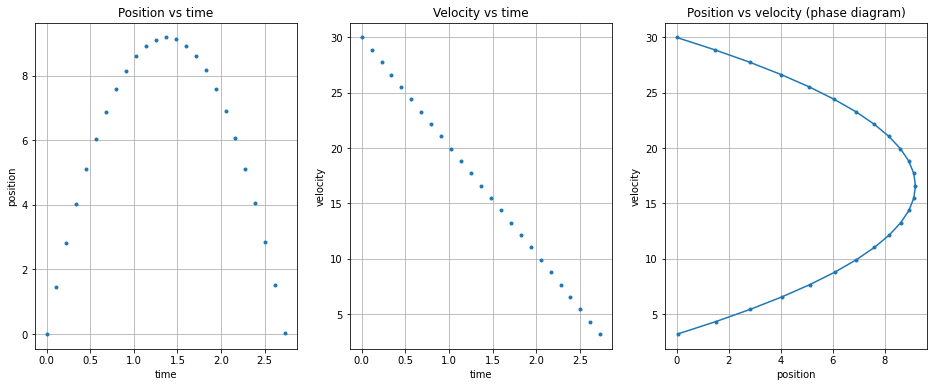

In [8]:
# initialization
d = 50. 
h0 = 25.
v0 = 30.

theta = np.arctan(h0/d) # Note that angles are in radians
vyp0 = v0*np.sin(theta)
g = -9.8
ha = np.zeros(25)
va = np.zeros(25)

ha[0] = h0
va[0] = v0

t_end = 2.735  # time object stays in air (pre-calculated)
ta = np.linspace(0, t_end, 25)

# simulation
idx = 0
for t in ta:
    ha[idx] = vyp0*t + 0.5*g*t**2
    va[idx] = v0 + g*t
    idx += 1

# Visualization
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].plot(ta, ha, '.')
ax[0].grid()
ax[0].set_xlabel('time')
ax[0].set_ylabel('position')
ax[0].set_title('Position vs time')
ax[1].plot(ta, va, '.')
ax[1].grid()
ax[1].set_xlabel('time')
ax[1].set_ylabel('velocity')
ax[1].set_title('Velocity vs time')

# phase space plot
ax[2].plot(ha, va, marker=".")
ax[2].grid()
ax[2].set_xlabel('position')
ax[2].set_ylabel('velocity')
ax[2].set_title('Position vs velocity (phase diagram)');


One of the benefits of drawing a phase space is that it allows you to visually represent the dynamically changing behavior of a system as a static trajectory in it. This provides a lot of intuitive, geometrical insight into the system’s dynamics, which would be hard to infer if you were just looking at algebraic equations.

There are several important things you can learn from phase space visualizations. 

First, you can tell from the phase space what will eventually happen to a system’s state in the long run. For a deterministic dynamical system, its future state is uniquely determined by its current state (hence, the name “deterministic”).

Second, you can learn how a system’s fate depends on its initial state. This, again, depends on the trajectory's behavior. We'll see more example of this later.

### Dicrete time model with 2-variables

In [19]:
# initialize system
a = 0.5
N = 20
x = np.zeros(N)
y = np.zeros(N)
ta = np.arange(N)

# set I.C.
x[0] = 1
y[0] = 1

In [20]:
# simulation
for t in np.arange(1, N):
    x[t] = a*x[t-1] + y[t-1]
    y[t] = -a*x[t-1] + y[t-1]
    

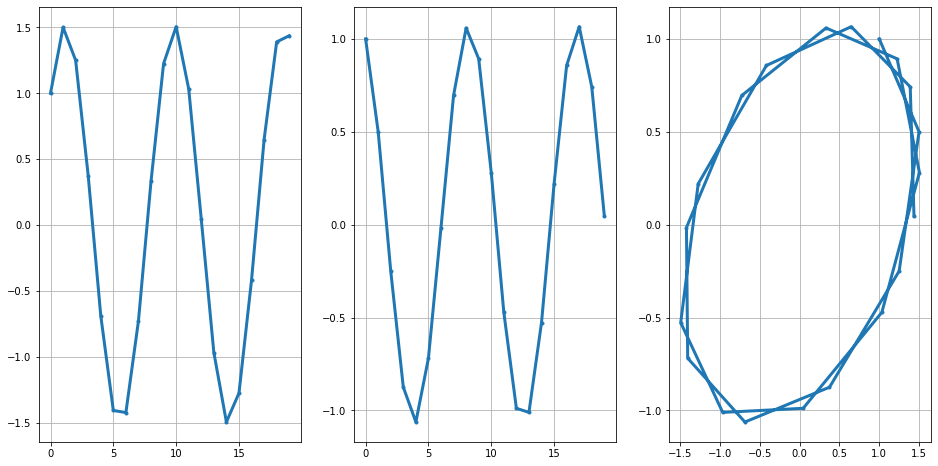

In [21]:
# visualize
fig, ax = plt.subplots(1,3,figsize=(16,8))
ax[0].plot(ta, x, '.-', linewidth=3)
ax[0].grid()
ax[1].plot(ta, y, '.-', linewidth=3)
ax[1].grid()
ax[2].plot(x, y, '.-', linewidth=3)
ax[2].grid()

Phase space plot: This will produce a trajectory of the system state in an x-y phase space, which clearly shows that the system is in an oval, periodic oscillation - which is a typical signature of a linear system.

`Linear dynamical systems can show only exponential growth/decay, periodic oscillation, stationary states (no change), or their hybrids (e.g., exponentially growing oscillation)`

---
---
---


#### Conclusion

Practical tips for mathematical model building

1. If you aren’t sure where to start, just grab an existing model and tweak it.

2. Implement each model assumption one by one. Don’t try to reach the final model in one jump.

3. To implement a new assumption, first identify which part of the model equation represents the quantity you are about to change, replace it with an unknown function, and then design the function.

4. Whenever possible, adopt the simplest mathematical form.

5. Once your equation is complete, check if it behaves as you desired. It is often helpful to test its behavior with extreme values assigned to variables and/or parameters.
